# CODE TO CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS

# STEP 0: PROBLEM STATEMENT

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

- The network used is called Le-Net that was presented by Yann LeCun
http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf


Citation

J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 

@inproceedings{Stallkamp-IJCNN-2011,
    author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel},
    booktitle = {IEEE International Joint Conference on Neural Networks},
    title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition},
    year = {2011},
    pages = {1453--1460}
}



# STEP 1: IMPORT LIBRARIES AND DATASET

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# import libraries 
import pickle      #pickle 是 Python 中用來序列化和反序列化物件的模組。透過使用 pickle，你可以將 Python 物件儲存到檔案中，然後在需要的時候再從檔案中載入出來，而不需要重新建構物件。
import seaborn as sns
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random

In [5]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train= pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [6]:
#查看有多少鍵值
keys = train.keys()
print(keys)

dict_keys(['coords', 'labels', 'features', 'sizes'])


In [7]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [8]:
X_train.shape

(34799, 32, 32, 3)

In [9]:
y_train.shape

(34799,)

# STEP 2: IMAGE EXPLORATION

31

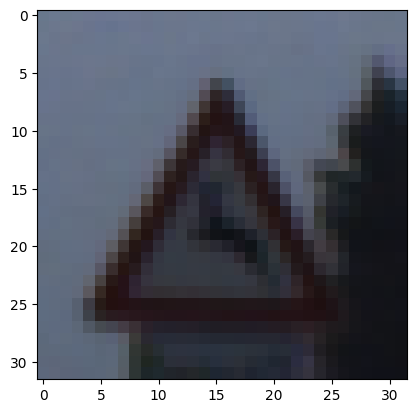

In [10]:
i = 610
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

# STEP 3: DATA PEPARATION

要對資料集進行洗牌（shuffle），可以使用 sklearn.utils.shuffle 函數。這個函數可以將特徵和標籤列表一起洗牌，確保特徵和對應的標籤仍然對應。這對於在訓練模型之前將資料集隨機化很有用，以確保模型在訓練過程中不受到資料排列順序的影響。

In [11]:
## Shuffle the dataset  打亂資料
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


沿著第三個軸（RGB 顏色通道）求和，並設定 keepdims=True，這樣計算結果會保持原始數組的維度。這在圖像處理中常用於將彩色圖像轉換為灰階圖像。

In [12]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 


這段程式碼是用來對灰度化後的訓練數據進行標準化處理的。讓我一步步解釋：

1.X_train_gray 是將原始訓練數據 X_train 轉換為灰度圖像後得到的數據。通常，灰度圖像的每個像素值都在 0 到 255 之間，表示不同的灰度級別。

2.(X_train_gray - 128) 這一部分表示對灰度化後的數據進行中心化處理。即將每個像素值減去 128，這樣原本的灰度級別中心就會位於 0 的位置。

3./128 則表示對中心化後的數據進行縮放，使得像素值落在 -1 到 1 之間。這是因為 128 是灰度圖像的中心值，除以 128 可以將像素值縮放到 -1 到 1 的範圍內。

總結來說，這段程式碼的作用是對灰度化後的訓練數據進行中心化和縮放處理，使得數據的範圍落在 -1 到 1 之間，這樣有助於模型訓練的穩定性和收斂速度。

In [13]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128


In [14]:
X_train_gray.shape

(34799, 32, 32, 1)

squeeze()：移除灰度圖像數據中的單維度軸，使得顯示圖像時的數據格式更簡潔。
cmap='gray'：指定顯示圖像時使用的灰度顏色映射，使得圖像以灰度方式呈現。

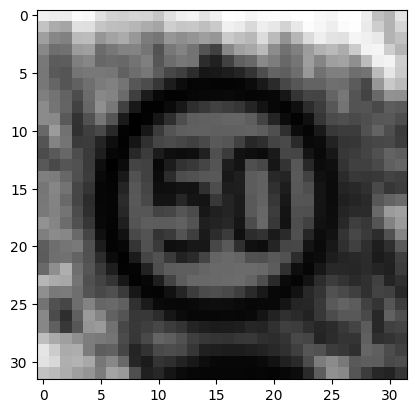

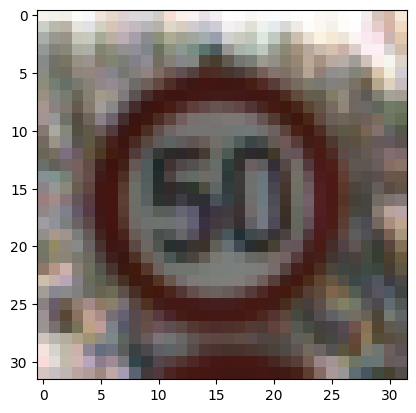

In [15]:
#比較一張圖 灰階跟原始色彩的情況。
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')  
plt.figure()
plt.imshow(X_train[i])


# STEP 4: MODEL TRAINING

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [16]:
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split


In [17]:
image_shape = X_train_gray[i].shape

In [18]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))


這段程式碼是用來編譯一個卷積神經網絡模型（CNN）。讓我來解釋一下每個參數的作用：

1.loss='sparse_categorical_crossentropy'：這是訓練模型時使用的損失函數（loss function）。在多類別分類問題中，特別是目標變量為整數形式（例如 0、1、2...）時，sparse_categorical_crossentropy 是一個常用的損失函數。它計算模型預測結果與真實標籤之間的差距，並且在訓練期間優化這個差距以提高模型的準確性。

2.optimizer=Adam(lr=0.001)：這是選擇用於優化模型的優化器（optimizer）。在這裡，我們使用了 Adam 優化器，並且設定了學習率（learning rate）為 0.001。Adam 是一種常用的優化器，它根據梯度的一階和二階矩估計來調整每個參數的學習率，有助於加快模型的收斂速度和提高訓練效果。

3.metrics=['accuracy']：這是用來評估模型性能的指標（metrics）。在這裡，我們使用了準確度（accuracy）作為評估指標，它衡量模型在測試數據上的預測準確性，即模型正確預測的樣本比例。

總結來說，這段程式碼是配置一個卷積神經網絡模型的訓練過程，包括選擇損失函數、優化器以及評估指標，以便在訓練過程中監控模型的性能並進行參數優化。

In [19]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

在 Keras 中，Model.fit() 方法已經不再使用 nb_epoch 這個參數了，而是改為使用 epochs 參數來指定訓練的輪數。

Epoch 1/50：表示第一個 epoch。
70/70：表示總共有 70 個訓練批次（batches）。

- 6s 75ms/step：表示每個 batch 花費了 6 秒 75 毫秒進行訓練。

loss: 3.1583：訓練損失（training loss）是 3.1583。

accuracy: 0.1753：訓練準確度（training accuracy）是 0.1753。

val_loss: 2.7883：驗證損失（validation loss）是 2.7883。

val_accuracy: 0.2896：驗證準確度（validation accuracy）是 0.2896。


這些信息可以用來評估模型的訓練情況，例如訓練和驗證的損失是否在下降，準確度是否在提高等。通常，隨著 epoch 數的增加，訓練損失應該逐漸減少，而訓練準確度則應該逐漸增加，同時驗證損失和驗證準確度也應該保持在一個合理的範圍內。

In [20]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 6s 67ms/step - loss: 3.2235 - accuracy: 0.1616 - val_loss: 2.9155 - val_accuracy: 0.2433
Epoch 2/50
70/70 [==============================] - 4s 63ms/step - loss: 1.8571 - accuracy: 0.4860 - val_loss: 1.6980 - val_accuracy: 0.5197
Epoch 3/50
70/70 [==============================] - 4s 62ms/step - loss: 1.0945 - accuracy: 0.6834 - val_loss: 1.2710 - val_accuracy: 0.6338
Epoch 4/50
70/70 [==============================] - 4s 64ms/step - loss: 0.7921 - accuracy: 0.7736 - val_loss: 1.0223 - val_accuracy: 0.6991
Epoch 5/50
70/70 [==============================] - 5s 67ms/step - loss: 0.6312 - accuracy: 0.8190 - val_loss: 0.9773 - val_accuracy: 0.7227
Epoch 6/50
70/70 [==============================] - 5s 69ms/step - loss: 0.5265 - accuracy: 0.8544 - val_loss: 0.8735 - val_accuracy: 0.7617
Epoch 7/50
70/70 [==============================] - 5s 65ms/step - loss: 0.4421 - accuracy: 0.8790 - val_loss: 0.8878 - val_accuracy: 0.7680
Epoch 8/50
70

# STEP 5: MODEL EVALUATION

cnn_model.evaluate() 方法會對測試集進行預測，然後計算模型在測試集上的損失值和準確度，最後將評估結果返回給 score 變量。通常，損失值越低越好，而準確度越高越好，因此可以通過 score 來評估模型的性能。

verbose=0 表示不顯示評估過程的詳細信息，只返回評估結果。
verbose=1 表示顯示評估過程的詳細信息

In [21]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=1)
print('Test Accuracy : {:.4f}'.format(score[1]))

395/395 [==============================] - 3s 7ms/step - loss: 1.5416 - accuracy: 0.8467
Test Accuracy : 0.8467


history(可變動).history 是其中一個屬性，它是一個字典，包含了各種訓練過程中記錄的指標值。
history(可變動).history.keys() 就是用來查看這個字典中有哪些可用的指標的鍵值（keys）。

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

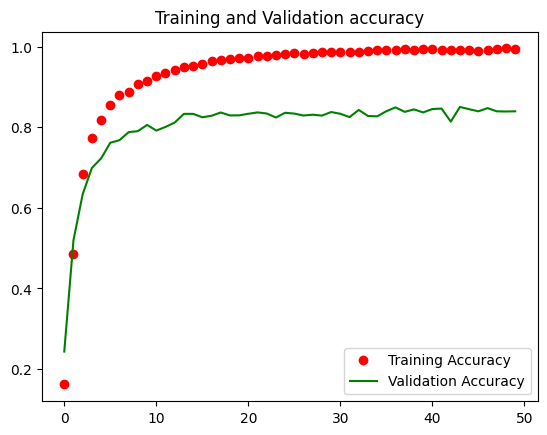

In [23]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Training Accuracy') #bo b藍色o圓點
plt.plot(epochs, val_accuracy, 'g', label='Validation Accuracy') #b blue 顏色
plt.title('Training and Validation accuracy')
plt.legend()


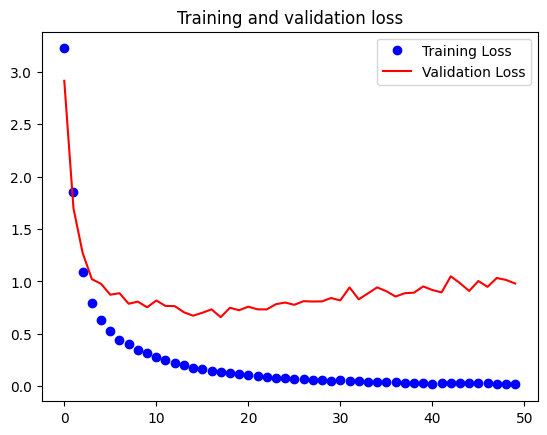

In [24]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [25]:
#get the predictions for the test data
predicted_classes = cnn_model.predict(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test


395/395 [==============================] - 2s 5ms/step


In [26]:
# 使用 NumPy 的 argmax() 函數獲取預測的類別
predicted_classes_N = np.argmax(predicted_classes, axis=1)
predicted_classes_N

array([16,  1, 38, ...,  3,  7, 37], dtype=int64)

這段程式碼是用來計算並繪製混淆矩陣（Confusion Matrix）的，以評估模型的分類性能。讓我來解釋一下每個部分的作用：

from sklearn.metrics import confusion_matrix：這行程式碼導入了混淆矩陣的計算函數。
cm = confusion_matrix(y_true, predicted_classes)：這行程式碼計算了實際標籤（y_true）與模型預測標籤（predicted_classes）之間的混淆矩陣。混淆矩陣是一個 N × N 的矩陣，其中 N 表示類別的數量，矩陣的每個元素表示真實類別與預測類別的樣本數量。
plt.figure(figsize = (25,25))：這行程式碼創建了一個圖表，設置了圖表的尺寸為 25 × 25，以便更清楚地顯示混淆矩陣。
sns.heatmap(cm, annot=True)：這行程式碼使用 Seaborn 庫中的熱度圖（Heatmap）功能，將混淆矩陣以視覺化的方式呈現在圖表中。參數 annot=True 表示在熱度圖中顯示數字標籤，以表示混淆矩陣的各個元素。
這樣就可以通過熱度圖清楚地看到模型在不同類別間的分類情況，有助於評估模型的性能和錯誤模式。

<Axes: >

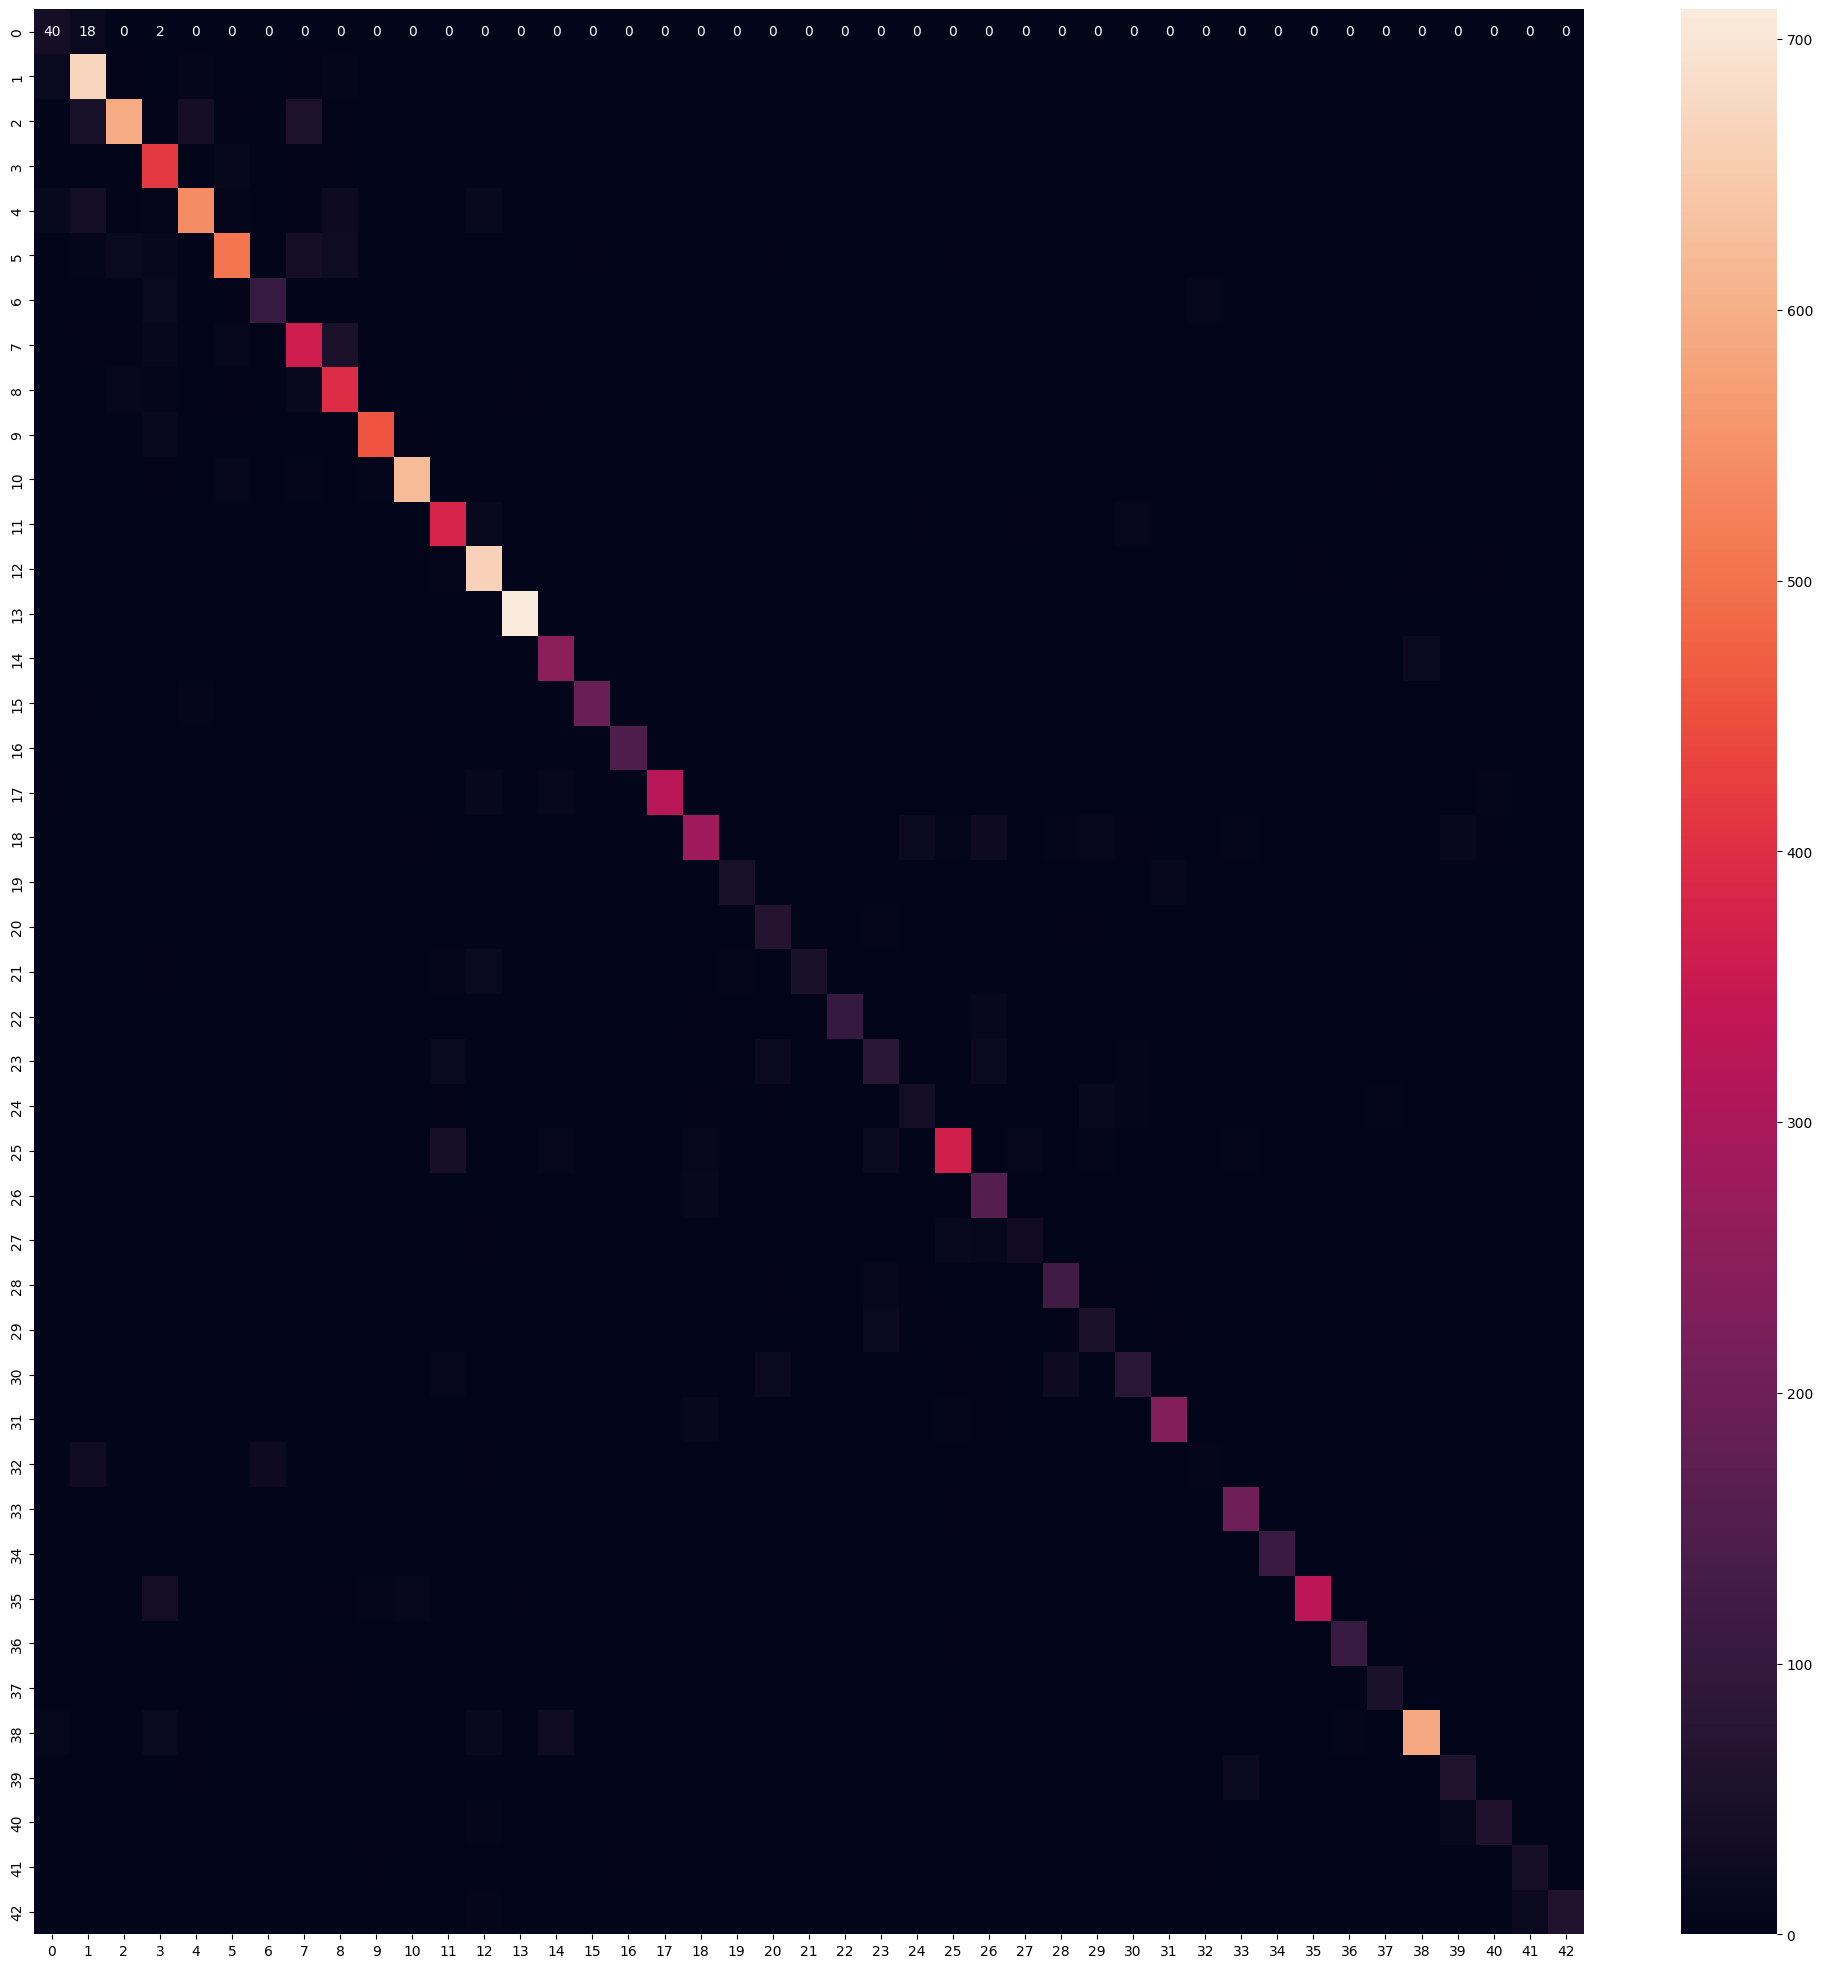

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes_N)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

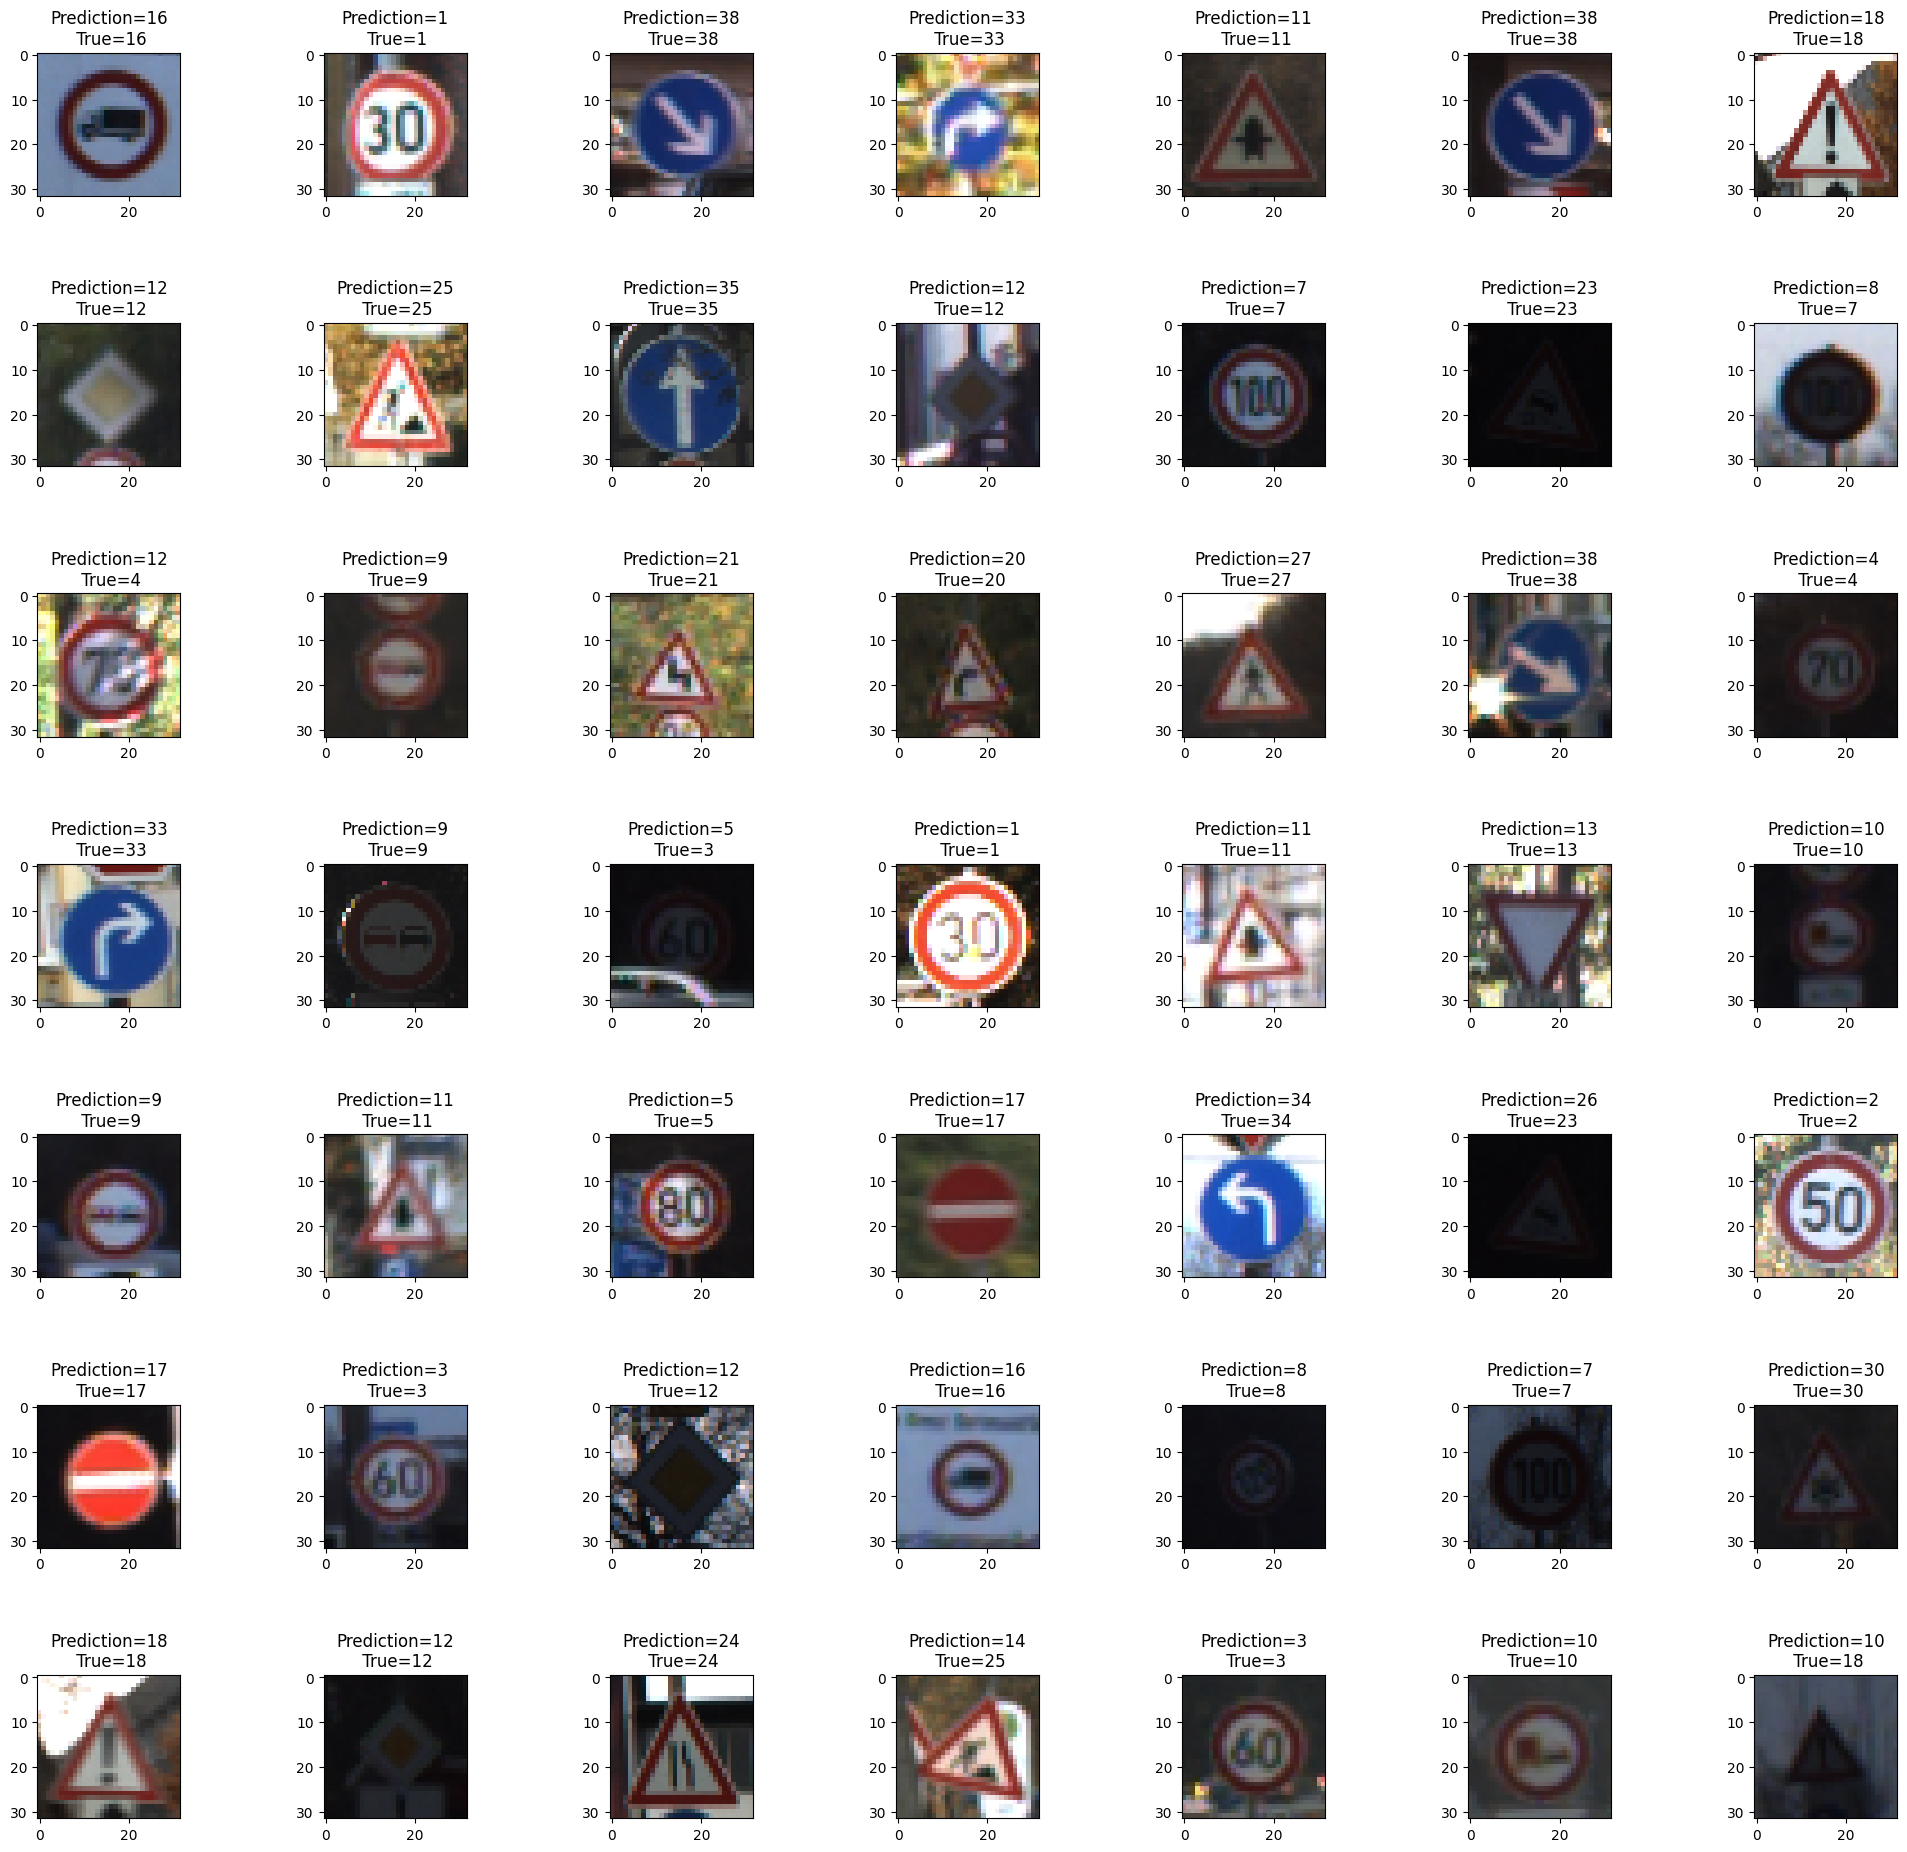

In [31]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (24,24))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes_N[i], y_true[i]))
    axes[i].axis('on')

plt.subplots_adjust(wspace=1)

# GREAT JOB! NOW YOU'VE MASTERED CNNS TRAINING USING KERAS!